In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"../Pandas/DATA/data.csv")
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [3]:
data.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [5]:
data.shape

(169, 4)

In [7]:
data['Calories'].fillna(data['Calories'].mean(),inplace=True)
data.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [8]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,169.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,262.385991
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,253.300000
50%,60.000000,105.000000,131.000000,321.000000
75%,60.000000,111.000000,141.000000,384.000000
max,300.000000,159.000000,184.000000,1860.400000


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


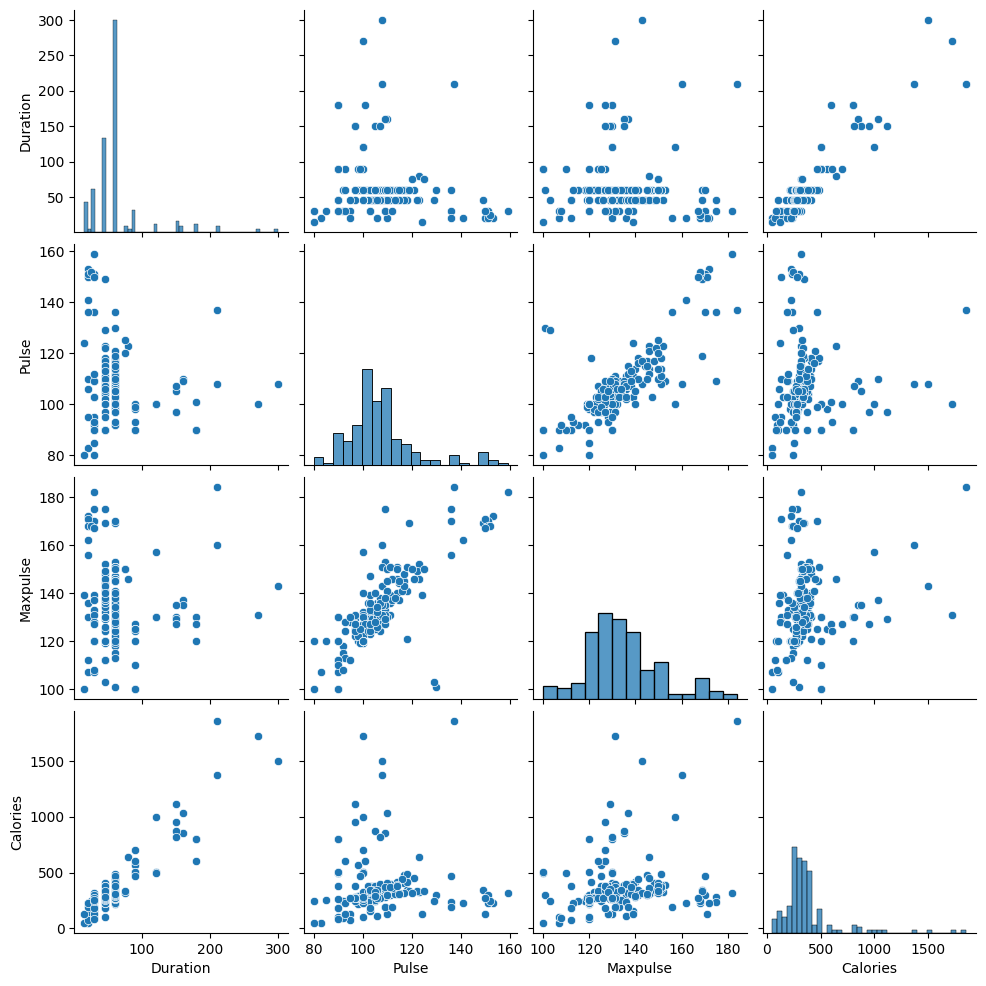

In [9]:
sns.pairplot(data)

In [10]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


<Axes: xlabel='Calories'>

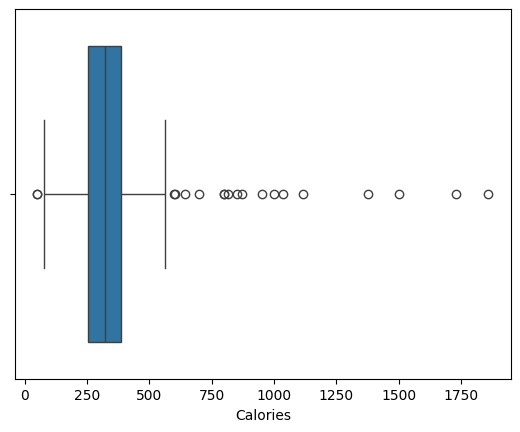

In [ ]:
sns.boxplot(x=data['Calories'])

In [51]:
q1 = data['Calories'].quantile(0.25)
q2 = data['Calories'].quantile(0.75)
iqr = q2-q1
min_range = q1 - (1.5*iqr)
max_range = q2 + (1.5*iqr)
min_range,max_range

(57.25000000000003, 580.05)

<Axes: xlabel='Calories'>

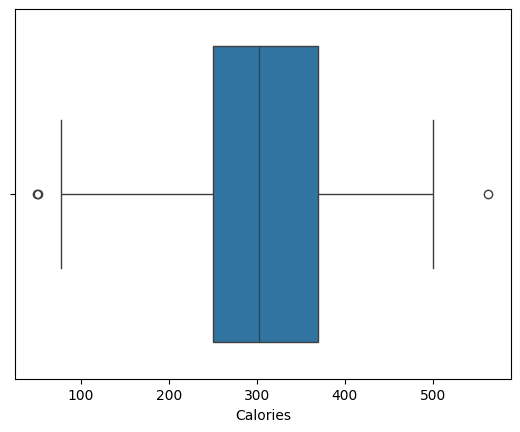

In [53]:
data=data[data['Calories']<=max_range]
sns.boxplot(x=data['Calories'])

<Axes: >

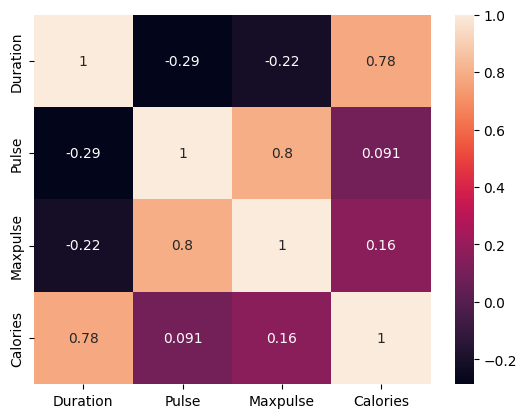

In [54]:
sns.heatmap(data.corr(),annot=True)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()
x = data[['Duration']]
y=data['Calories']

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
lr.fit(x_train,y_train)
lr.score(x_test,y_test),lr.score(x_train,y_train)

(0.6409983552975091, 0.5969327615904894)

In [71]:
lr.predict([[60]])

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([336.13305208])

In [77]:
data.duplicated().sum()
data=data.drop_duplicates()
data.duplicated().sum()

0

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  145 non-null    int64  
 1   Pulse     145 non-null    int64  
 2   Maxpulse  145 non-null    int64  
 3   Calories  145 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.7 KB


In [78]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


<Axes: xlabel='Duration', ylabel='Calories'>

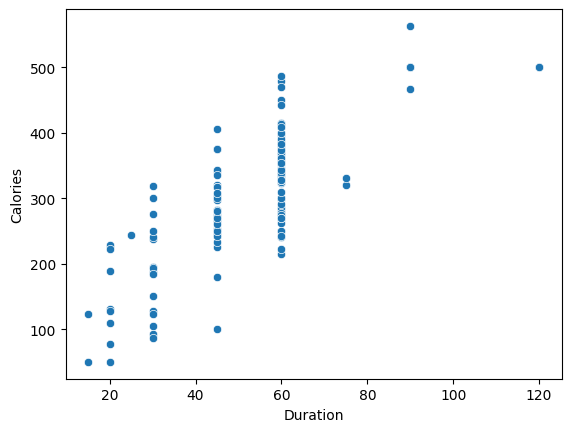

In [ ]:
sns.scatterplot(x='Duration',y='Calories',data=data)

In [81]:
data.describe()

,Duration,Pulse,Maxpulse,Calories
count,145.000000,145.000000,145.000000,145.000000
mean,52.206897,108.096552,133.855172,304.747250
std,17.823166,15.004779,16.507565,100.140141
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.400000
50%,60.000000,106.000000,131.000000,305.000000
75%,60.000000,112.000000,141.000000,374.000000
max,120.000000,159.000000,182.000000,563.200000


In [82]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


<Axes: xlabel='Calories', ylabel='Count'>

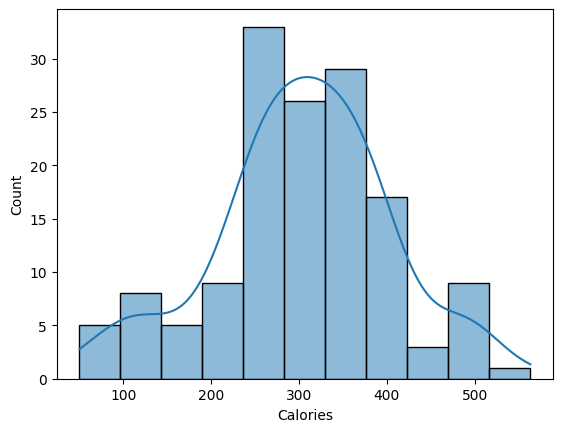

In [91]:
sns.histplot(x=data['Calories'],kde=True)

In [93]:
data['Calories_per_minute'] = data['Calories']/data['Duration']
data.head()

,Duration,Pulse,Maxpulse,Calories,Calories_per_minute
0,60,110,130,409.1,6.818333
1,60,117,145,479.0,7.983333
2,60,103,135,340.0,5.666667
3,45,109,175,282.4,6.275556
4,45,117,148,406.0,9.022222


<Axes: >

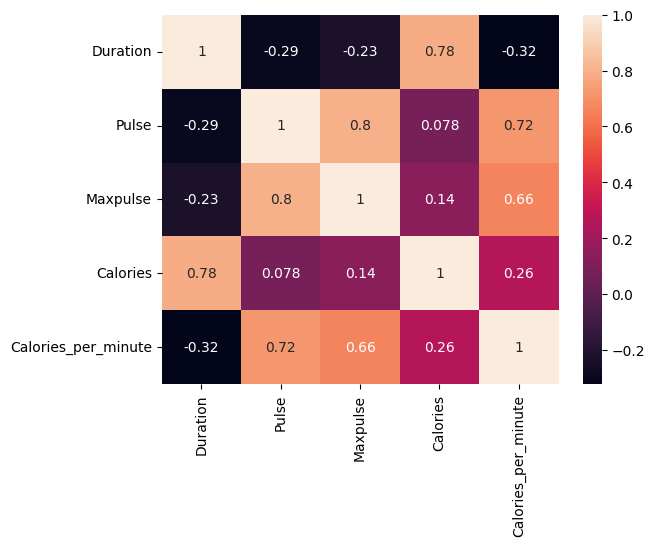

In [95]:
sns.heatmap(data.corr(),annot=True)